In [1]:
import time
import os

import pandas as pd
import numpy as np
np.set_printoptions(precision=6, suppress=True)

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = ((8/2.54), (6/2.54))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams.update({'font.size': 11})
MARKER_SIZE = 15
cmap_m = ["#f4a6ad", "#f6957e", "#fccfa2", "#8de7be", "#86d6f2", "#24a9e4", "#b586e0", "#d7f293"]
cmap = ["#e94d5b", "#ef4d28", "#f9a54f", "#25b575", "#1bb1e7", "#1477a2", "#a662e5", "#c2f442"]

plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

## data loading

In [4]:
l = np.load('./data/tot_dataset_ffnn.npz')
test_input = l['test_input']
test_label = l['test_label']
MAXS = l['MAXS']
MINS = l['MINS']
MAXS = MAXS
MINS = MINS

In [5]:
print(test_input.shape)
print(test_label.shape)

(79439, 20)
(79439, 5)


In [6]:
test_input = test_input.astype(np.float32)
test_label = test_label.astype(np.float32)

## evaluation

In [7]:
masking = 1- test_input[..., 5:10]

In [8]:
masked_label = np.ma.array(test_label, mask=masking)
masked_label = pd.DataFrame(masked_label.filled(fill_value=np.nan))

In [9]:
test_pred = masked_label.interpolate().bfill()

In [10]:
masking = test_input[..., 5:10]

In [11]:
masked_label = np.ma.array(test_label, mask=masking)
masked_pred = np.ma.array(test_pred, mask=masking)

In [12]:
for _ in range(test_label.shape[-1]):
    print(np.sqrt(mean_squared_error(masked_label[..., _].reshape(-1), masked_pred[..., _].reshape(-1))))

0.047421873
0.04250105
0.050347492
0.023678405
0.09218559


In [13]:
for _ in range(test_label.shape[-1]):
    print(r2_score(masked_label[..., _][~masked_label[..., _].mask].data.reshape(-1),
             masked_pred[..., _][~masked_pred[..., _].mask].data.reshape(-1)))

0.7063445343625157
0.8785138828076463
0.7582635203056263
0.6168403548565766
0.1659820360665496


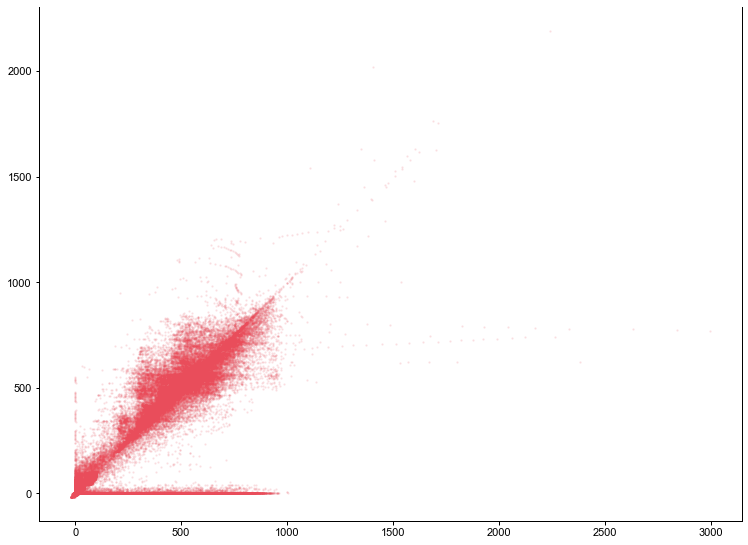

In [14]:
plot_label = ((MAXS-MINS)*masked_label + MINS).reshape(-1, 1)
plot_label = plot_label[~plot_label.mask]
plot_pred = ((MAXS-MINS)*masked_pred + MINS).reshape(-1, 1)
plot_pred = plot_pred[~plot_pred.mask]
fig = plt.figure(figsize=((8/2.54)*4, (6/2.54)*4))
plt.scatter(plot_label, plot_pred, c=cmap[0], s=2, alpha=0.1)
plt.show()

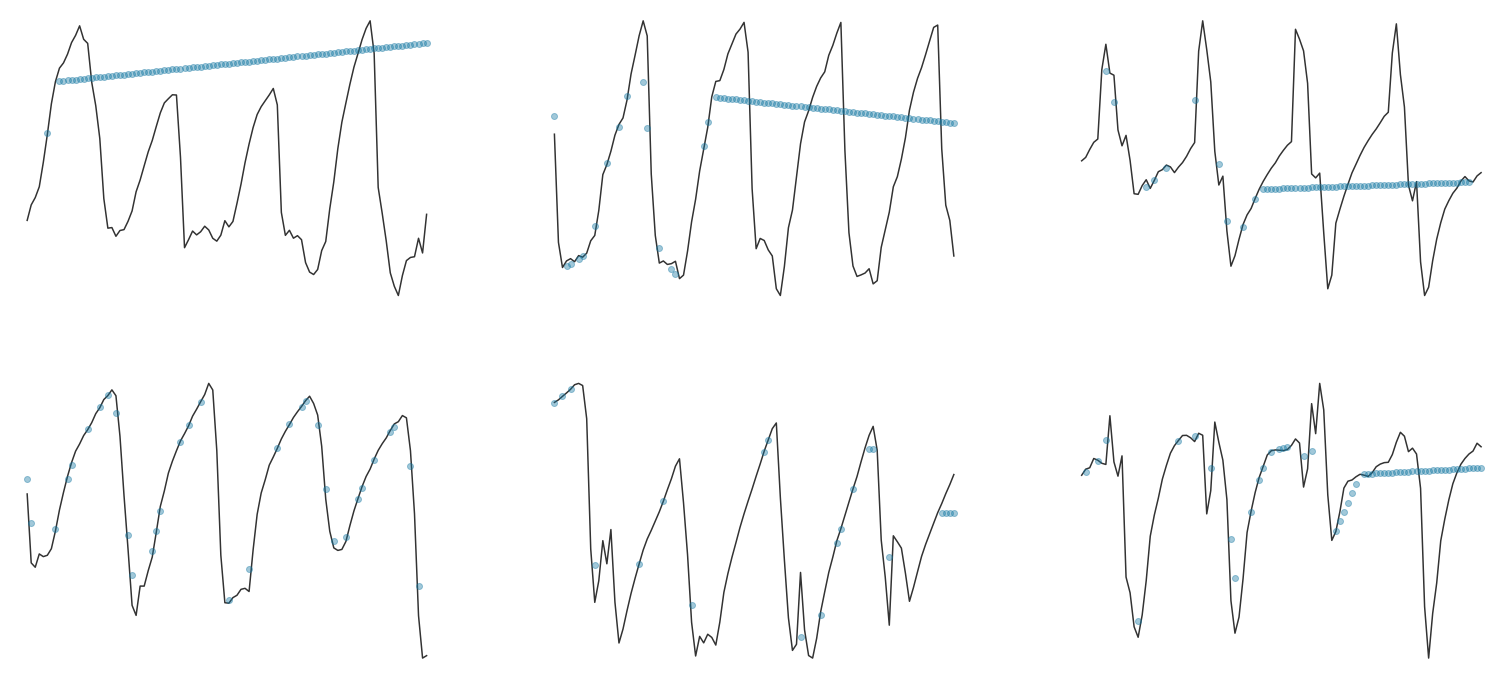

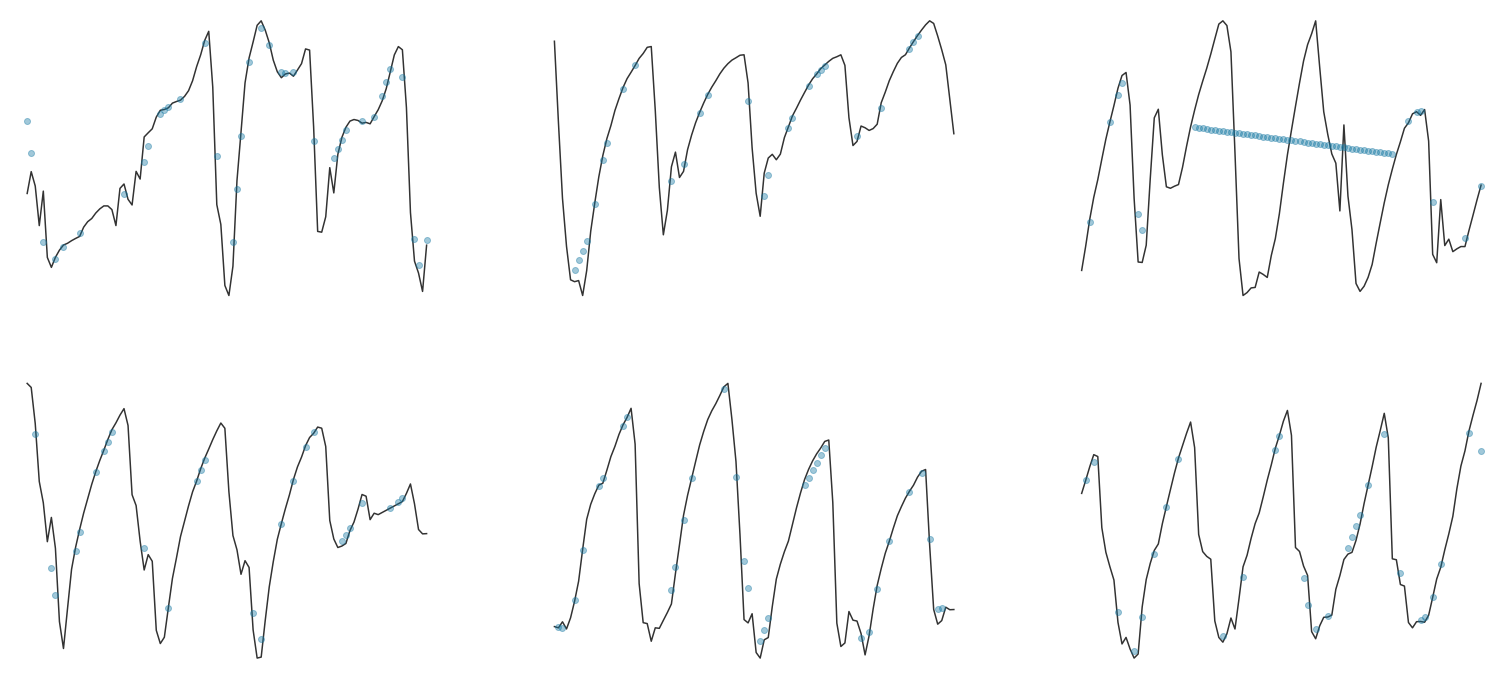

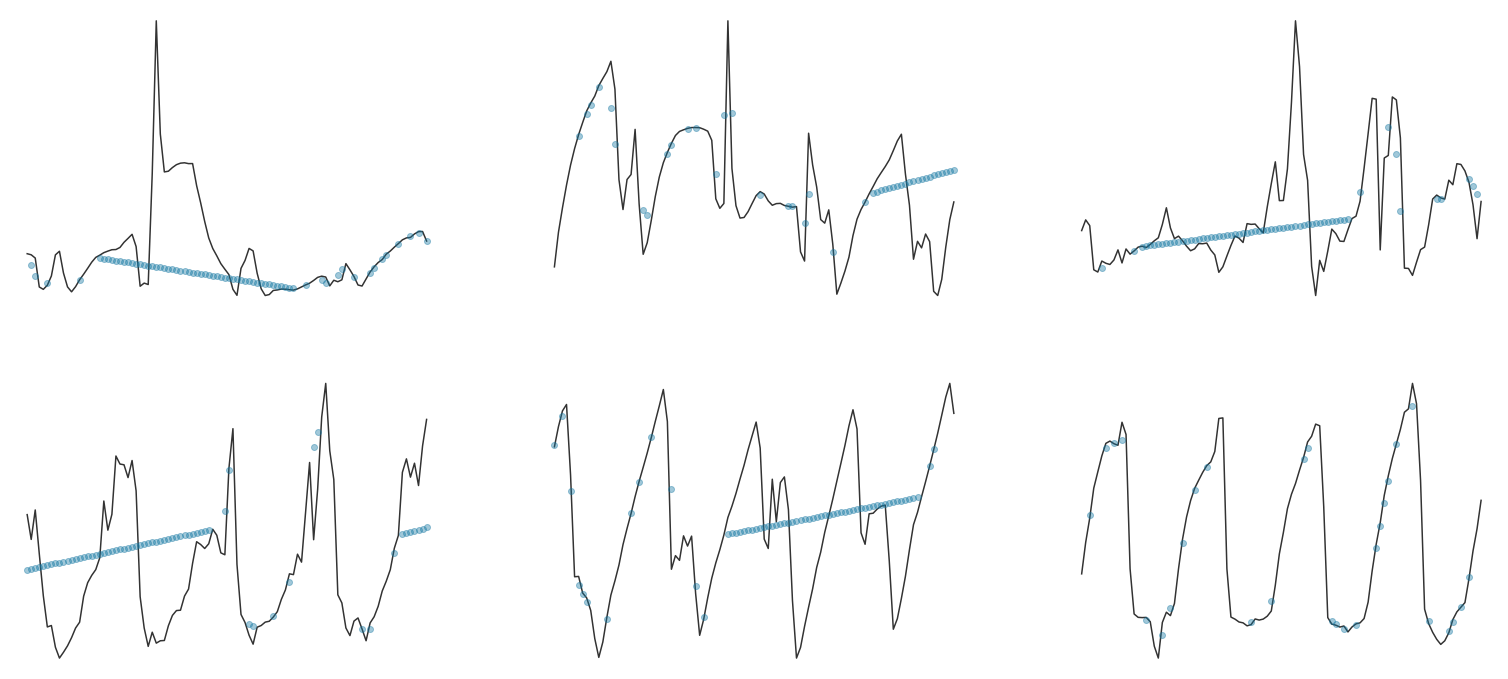

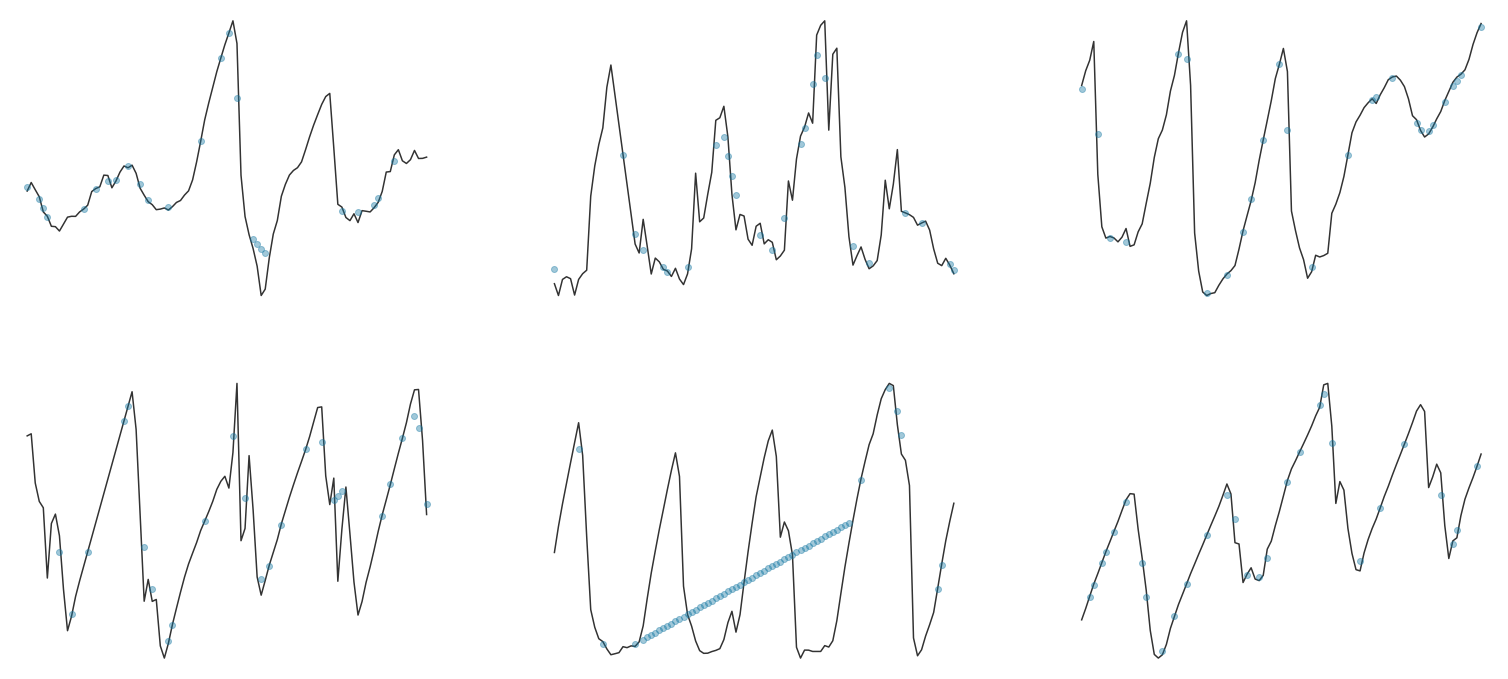

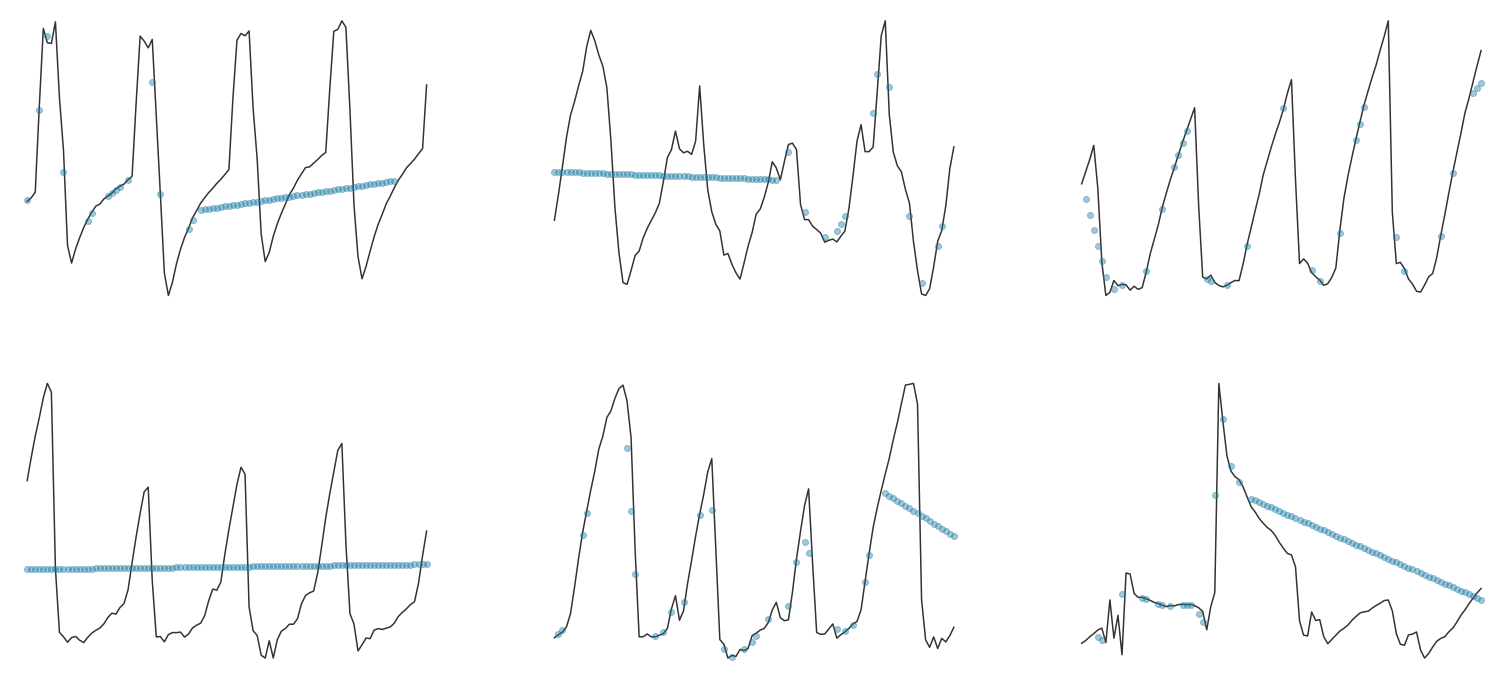

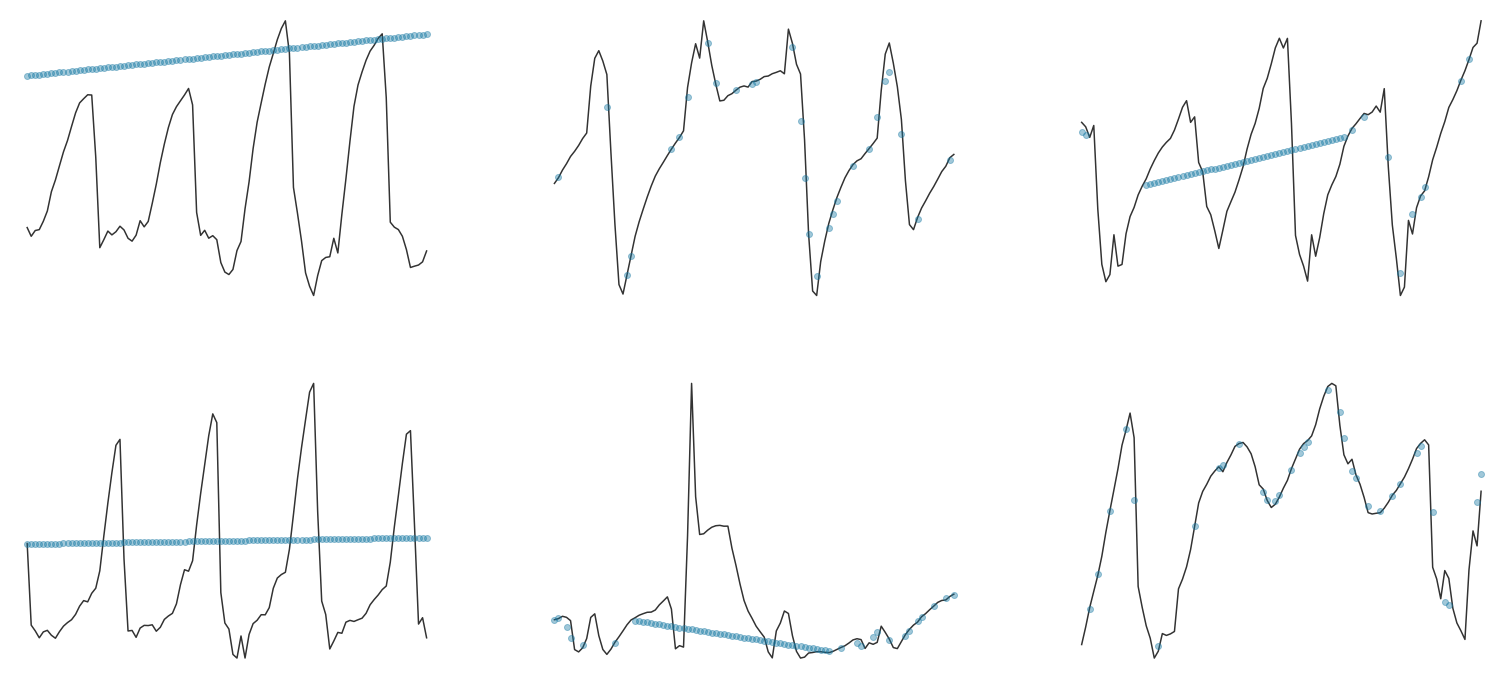

In [15]:
plot_len = 100
x_t = np.arange(0, plot_len)
for _ in range (6):

        NUMBERS = np.arange(1, test_label.shape[0])
        np.random.shuffle(NUMBERS)
        NUMBERS = NUMBERS[:6]
        position = 331
        fig = plt.figure(figsize=((8.5/2.54)*8, (6/2.54)*8))
        
        i=3
        for NUMBER in NUMBERS:
            ax = plt.subplot(position)
            measured1 = plt.plot(x_t, test_label[NUMBER:NUMBER+plot_len, i], c='k', alpha=0.8) #measured
            expect1 = plt.plot(x_t, masked_pred[NUMBER:NUMBER+plot_len, i], 'o', c=cmap[5], alpha=0.4) #estimated
            #expect1 = plt.plot(x_t, pred_result[NUMBER:NUMBER+plot_len, i], c=cmap[2], alpha=0.4) #estimated
            ax.axis('off')

            position += 1
        plt.show()
        _ += 1

In [16]:
plot_label = ((MAXS[:5]-MINS[:5])*masked_label[..., :5] + MINS[:5])
plot_label.fill_value = np.nan
plot_pred = ((MAXS[:5]-MINS[:5])*masked_pred[..., :5] + MINS[:5])
plot_pred.fill_value = np.nan

In [17]:
f = open('./results/Linear_interpol.npz', 'wb')
np.savez(f,
         test_label = plot_label.filled(),
         test_pred = plot_pred.filled()
        )
f.close()